<a href="https://colab.research.google.com/github/sqb-codes/ATAL_FDP_24/blob/main/GAN_BladderCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "squarebrackets"
os.environ["KAGGLE_KEY"] = "b2ee878c1b5d541bf70ac9ed1a0289e3"

!kaggle datasets download shirtgm/bladder-cancer-classification

Dataset URL: https://www.kaggle.com/datasets/shirtgm/bladder-cancer-classification
License(s): unknown
 99% 162M/164M [00:09<00:00, 24.0MB/s]
100% 164M/164M [00:09<00:00, 17.2MB/s]


In [2]:
!unzip bladder-cancer-classification.zip

Archive:  bladder-cancer-classification.zip
  inflating: Center_1/muscle invasive bladder/0.png  
  inflating: Center_1/muscle invasive bladder/1.png  
  inflating: Center_1/muscle invasive bladder/10.png  
  inflating: Center_1/muscle invasive bladder/100.png  
  inflating: Center_1/muscle invasive bladder/101.png  
  inflating: Center_1/muscle invasive bladder/102.png  
  inflating: Center_1/muscle invasive bladder/103.png  
  inflating: Center_1/muscle invasive bladder/104.png  
  inflating: Center_1/muscle invasive bladder/105.png  
  inflating: Center_1/muscle invasive bladder/106.png  
  inflating: Center_1/muscle invasive bladder/107.png  
  inflating: Center_1/muscle invasive bladder/108.png  
  inflating: Center_1/muscle invasive bladder/109.png  
  inflating: Center_1/muscle invasive bladder/11.png  
  inflating: Center_1/muscle invasive bladder/110.png  
  inflating: Center_1/muscle invasive bladder/111.png  
  inflating: Center_1/muscle invasive bladder/112.png  
  inflatin

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import cv2

In [7]:
img = cv2.imread("Center_1/muscle invasive bladder/1.png")

In [8]:
img.shape

(320, 320, 3)

(-0.5, 319.5, 319.5, -0.5)

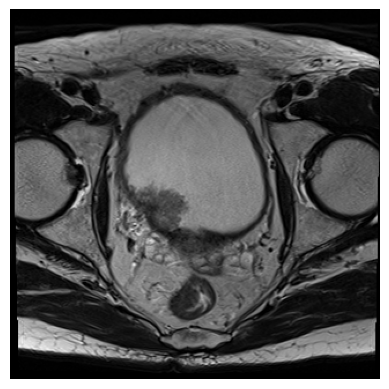

In [10]:
plt.imshow(img)
plt.axis("off")

In [13]:
# Load the dataset
def load_data(dir, image_size=(64,64)):
  dataset = tf.keras.preprocessing.image_dataset_from_directory(
      dir,
      label_mode=None,
      image_size=image_size,
      batch_size=32,
      shuffle=True,
      color_mode="grayscale"
  )
  dataset = dataset.map(lambda x : (x / 255.0))
  return dataset

In [14]:
data = load_data("Center_1")

Found 641 files.


In [15]:
# Build generator model
def build_generator(noise_dim):
  model = tf.keras.Sequential([
      layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(noise_dim,)),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      # Reshape the output into a 3D tensor (image format)
      layers.Reshape((8, 8, 256)),

      # Upsample - 16x16
      layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding="same", use_bias=False),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      # Upsample - 32x32
      layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding="same", use_bias=False),
      layers.BatchNormalization(),
      layers.LeakyReLU(),

      # Upsample - 64x64
      layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding="same", use_bias=False, activation="tanh")
  ])
  return model

In [16]:
def build_discriminator():
  model = tf.keras.Sequential([
      # Downsample - 32x32
      layers.Conv2D(64, (5,5), strides=(2,2), padding="same", input_shape=[64,64,1]),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      # Downsample - 16 x 16
      layers.Conv2D(128, (5,5), strides=(2,2), padding="same"),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      # Downsample - 8 x 8
      layers.Conv2D(256, (5,5), strides=(2,2), padding="same"),
      layers.LeakyReLU(),
      layers.Dropout(0.3),

      layers.Flatten(),
      layers.Dense(1)
  ])

  return model

In [17]:
noise_dim = 100
generator = build_generator(noise_dim)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# generator.summary()

In [21]:
fake_img = generator.predict(np.random.normal(size=(1, noise_dim)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
fake_img.shape

(1, 64, 64, 1)

(-0.5, 63.5, 63.5, -0.5)

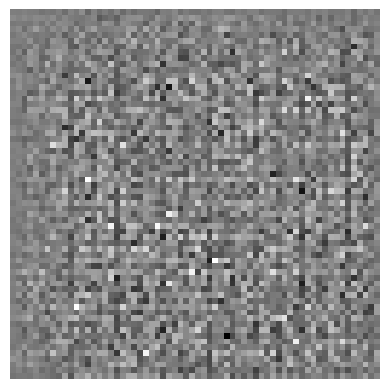

In [23]:
plt.imshow(fake_img[0, :, :, 0], cmap="gray")
plt.axis("off")